# <span style="color:blue">  Esercitazione 4</span>

Questa esercitazione è dedicata alle simulazioni di dinamica molecolare. In particolare, si considera un ensemble microcanonico (energia totale conservata) di 108 particelle soggette a condizioni al contorno periodiche (Periodic Boundary Conditions, PBC). L'evoluzione temporale di questo sistema è ottenuta integrando le equazioni del moto con l'algoritmo di Verlet. Questo risulta essere, infatti, particolarmente stabile nel tempo e quindi adeguato a simulazioni relativamente lunghe come quelle di dinamica molecolare. La conoscenza di posizioni e velocità ricoperte ad istanti di tempo successivi (ovvero in funzione degli step di integrazione) ci permette di monitorare alcune grandezze fisiche di interesse come l'energia cinetica, l'energia potenziale, la temperatura e la pressione.

## Esercizio 4.1

Il primo esercizio consiste in realtà nell'integrare il codice di simulazione numerica forntito con il calcolo a livello microscopico della pressione. Per chiarezza di quanto viene eseguito dal codice, si riporta di seguito l'espressione delle grandezze fisiche di interesse. L'interazione tra particelle è descritta dal potenziale di Lennard-Jones
$$
V(r) = 4\varepsilon\Big[\Big(\frac{\sigma}{r}\Big)^{12}-\Big(\frac{\sigma}{r}\Big)^6\Big]
$$
dove $\varepsilon$ è la profondità della buca di potenziale, $\sigma$ modellizza il raggio sferico delle particelle e $r$ è la distanza tra due particelle. La pressione, invece, si ottiene a partire dal teorema del viriale e si dimostra essere scritta come
$$ 
P = \rho k_B \langle T \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\varepsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle 
$$

Risulta conveniente lavorare con grandezze ridotte, ovvero opportunamente rese adimensionali. Ad esempio, esprimiamo le lunghezze in unità di $\sigma$, le energie in unità di $\epsilon$ e le masse in unità di $m$, detta $m$ la massa di una particella. Di conseguenza, anche le altre grandezze (potenziale, pressione, densità, temperatura) saranno rese adimensionali in funzione di queste:
$$
V^*=\frac{V}{\varepsilon} \qquad P^*=\frac{P\sigma^3}{\varepsilon} \qquad \rho^*=\rho\sigma^3 \qquad T^*=\frac{k_BT}{\varepsilon}
$$
Il potenziale risulta pertanto scritto come
$$
V^*(r) = 4\Big[\Big(\frac{1}{r}\Big)^{12}-\Big(\frac{1}{r}\Big)^6\Big]
$$
L'energia cinetica e la temperatura sono rispettivamente date da
$$
E_k^* = \frac{1}{2}\sum_{i=1}^{N}v_i^2 \qquad T^* = \frac{2}{3}\frac{E_k^*}{Nk_B}
$$
detto $N$ il numero di particelle del sistema e la pressione si riscrive come
$$ 
P^* = \rho^* k_B \langle T^* \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[ \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle 
$$
Per comodità possiamo scegliere di porre $k_B=1$.

## Esercizio 4.2

Viene ora simulato un sistema composto da 108 atomi di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in tre fasi differenti:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio cut-off: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio cut-off: $r_c = 5.0$)
 
La scelta del raggio di cut-off è motivata dal fatto che vengono tagliate le code del potenziale di Lennard-Jones, il cui contributo è minimo rispetto a particelle a mutua distanza inferiore a tale valore.

Dalle tre disitinte simulazioni estraiamo i valori di energia totale per particella, energia cinetica per particella, energia potenziale per particella, pressione e temperatura. Queste vengono monitorate ad ogni step di integrazione della simulazione di dinamica molecolare. Vengono quindi calcolate con la media a blocchi considerando $20$ blocchi da $5\cdot10^4$ step di integrazione ciascuno. In totale, la simulazione si compone quindi di $10^6$ step. Tutte le grandezze riportate si intendono ridotte, quindi adimensionali.

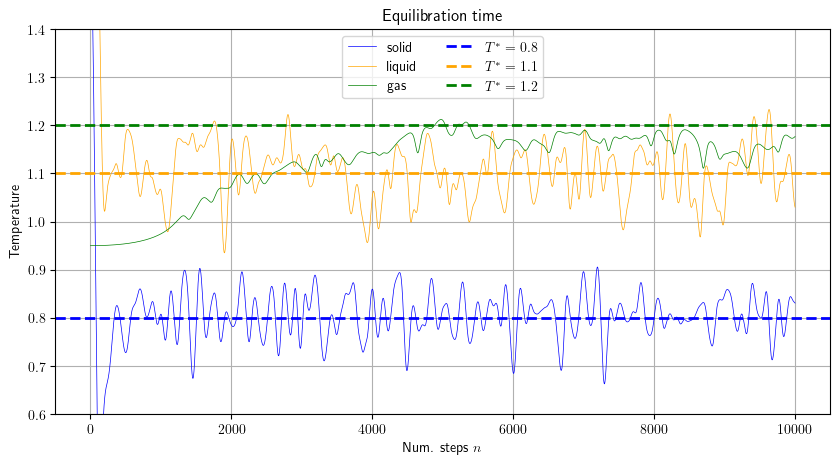

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 3 simulazioni
data1 = np.loadtxt('temp_equilibration_sol.dat')
data2 = np.loadtxt('temp_equilibration_liq.dat')
data3 = np.loadtxt('temp_equilibration_gas.dat')

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True

# Andamento della temperatura in funzione dello step di integrazione
plt.plot(data1[:,0], data1[:,1], color='blue', linewidth=0.5, label='solid')
plt.plot(data2[:,0], data2[:,1], color='orange', linewidth=0.5, label='liquid')
plt.plot(data3[:,0], data3[:,1], color='green', linewidth=0.5, label='gas')

# Temperatura target delle 3 simulazioni
plt.axhline(0.8, color='blue', linestyle='--', linewidth=2, label='$T^*=0.8$')
plt.axhline(1.1, color='orange', linestyle='--', linewidth=2, label='$T^*=1.1$')
plt.axhline(1.2, color='green', linestyle='--', linewidth=2, label='$T^*=1.2$')

plt.ylim(0.6, 1.4)
plt.xlabel('Num. steps $n$')
plt.ylabel('Temperature')
plt.title("Equilibration time")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)
plt.grid(True)

plt.show()

Il sistema richiede di essere equilibrato prima di procedere con le varie misure. Ciò è dovuto al fatto che la configurazione di partenza corrispondente in genere ad una temperatura differente da quella di simulazione. Il sistema deve avere quindi modo di equilibrarsi affinché raggiunga la temperatura richiesta.

Nel nostro caso si è scelto di partire da una situazione ordinata in cui gli atomi sono inizialmente disposti su di un reticolo fcc. Come fase di equilibrazione si sono scelti i seguenti parametri:
1. fase solida: $T^*_i=1.55$, $10^3$ step di equilibrazione
2. fase liquida: $T^*_i=1.99$, $10^3$ step di equilibrazione
3. fase gassosa: $T^*_i=0.95$, $10^4$ step di equilibrazione

In effetti, la figura mostra che la fase solida e quella liquida si equilibrano già dopo qualche centinaio di step di integrazione, mentre la fase gassosa richiede un tempo di equilibrazione più lungo di qualche migliaia di step.

E' interessante osservare che nel caso della fase solido/liquido la temperatura iniziale deve essere scelta maggiore, viceversa minore nel caso della fase gassosa. Ciò è dovuto al fatto che nel primo caso è richiesta un'energia iniziale aggiuntiva affinché le particelle possano avvicinarsi tra loro vincendo la loro ridotta mobilità, adattandosi quindi alle condizioni di densità e temperatura del sistema. Al contrario, nella fase gassosa le particelle hanno maggiore mobilità, quindi non è necessario fornire energia aggiuntiva. Anzi, l'energia iniziale deve essere inferiore per mantenere inizialmente una situazione iniziale più ordinata, lasciando che la maggior libertà di movimento delle particelle porti il sistema ad adeguarsi alla temperatura selezionata.

Di seguito vengono riportati i risultati sulle grandezze prima descritte. A tal proposito, è interessante notare le seguenti cose:
1. Lavorando in ensemble microcanico ci aspettiamo che l'energia totale sia conservata. In effetti, questa risulta essere conservata entro la quarta cifra decimale. La stabilità di questa misura può essere presa come indicatore della stabilità dell'algoritmo di Verlet con cui vengono integrate le equazioni del moto.
2. L'energia cinetica e l'energia potenziale seguono un andamento speculare: l'aumento (o la riduzione) di una si traducono nella riduzione (o aumento) dell'altra nella stessa misura. Questa è evidentemente una conseguenza della conservazione dell'energia totale.
3. La temperatura segue lo stesso andamento dell'energia cinetica. Questo segue dal principio di equipartizione dell'energia.
4. La pressione e la temperatura seguono lo stesso andamento. Questo segue direttamente dall'espressione della pressione in quanto il primo termine dipende linearmente dalla temperatura, che sembra quindi essere il termine dominante rispetto al secondo del viriale. 

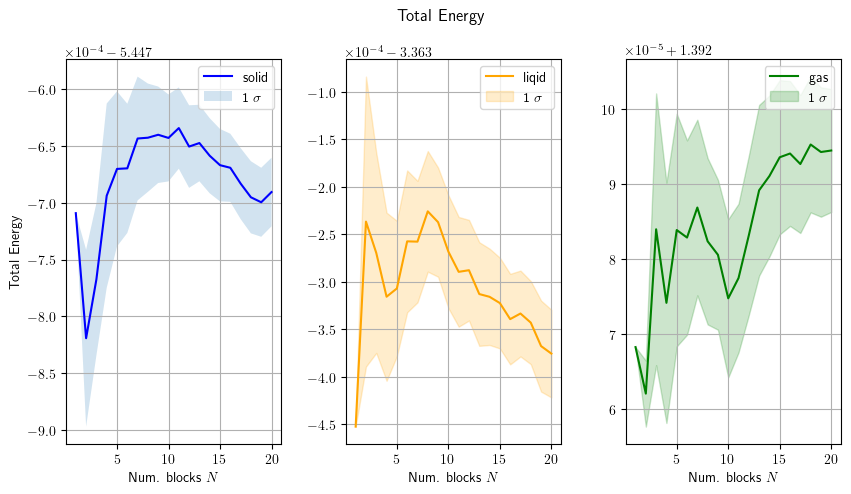

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 3 simulazioni
data1 = np.loadtxt('total_energy_sol.dat')
data2 = np.loadtxt("total_energy_liq.dat")
data3 = np.loadtxt("total_energy_gas.dat")

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Total Energy')

# Grafico fase solida
plt.subplot(1,3,1)
plt.plot(data1[:,0], data1[:,2], color='blue', label='solid')
plt.fill_between(data1[:,0], data1[:,2]-data1[:,3], data1[:,2]+data1[:,3], alpha=0.2, label='1 $\\sigma$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlabel('Num. blocks $N$')
plt.ylabel('Total Energy')
plt.legend()
plt.grid(True)

# Grafico fase liquida
plt.subplot(1,3,2)
plt.plot(data2[:,0], data2[:,2], color='orange', label='liqid')
plt.fill_between(data2[:,0], data2[:,2]-data2[:,3], data2[:,2]+data2[:,3], alpha=0.2, color='orange', label='1 $\\sigma$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

# Grafico fase gassosa
plt.subplot(1,3,3)
plt.plot(data3[:,0], data3[:,2], color='green', label='gas')
plt.fill_between(data3[:,0], data3[:,2]-data3[:,3], data3[:,2]+data3[:,3], alpha=0.2, color='green', label='1 $\\sigma$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

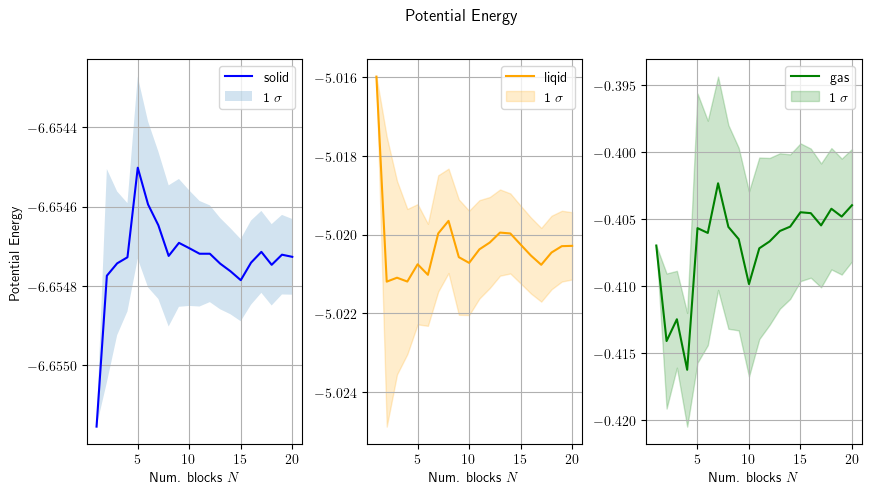

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 3 simulazioni
data1 = np.loadtxt("potential_energy_sol.dat")
data2 = np.loadtxt("potential_energy_liq.dat")
data3 = np.loadtxt("potential_energy_gas.dat")

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Potential Energy')

# Grafico fase solida
plt.subplot(1,3,1)
plt.plot(data1[:,0], data1[:,2], color='blue', label='solid')
plt.fill_between(data1[:,0], data1[:,2]-data1[:,3], data1[:,2]+data1[:,3], alpha=0.2, label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.ylabel('Potential Energy')
plt.legend()
plt.grid(True)

# Grafico fase liquida
plt.subplot(1,3,2)
plt.plot(data2[:,0], data2[:,2], color='orange', label='liqid')
plt.fill_between(data2[:,0], data2[:,2]-data2[:,3], data2[:,2]+data2[:,3], alpha=0.2, color='orange', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

# Grafico fase gassosa
plt.subplot(1,3,3)
plt.plot(data3[:,0], data3[:,2], color='green', label='gas')
plt.fill_between(data3[:,0], data3[:,2]-data3[:,3], data3[:,2]+data3[:,3], alpha=0.2, color='green', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

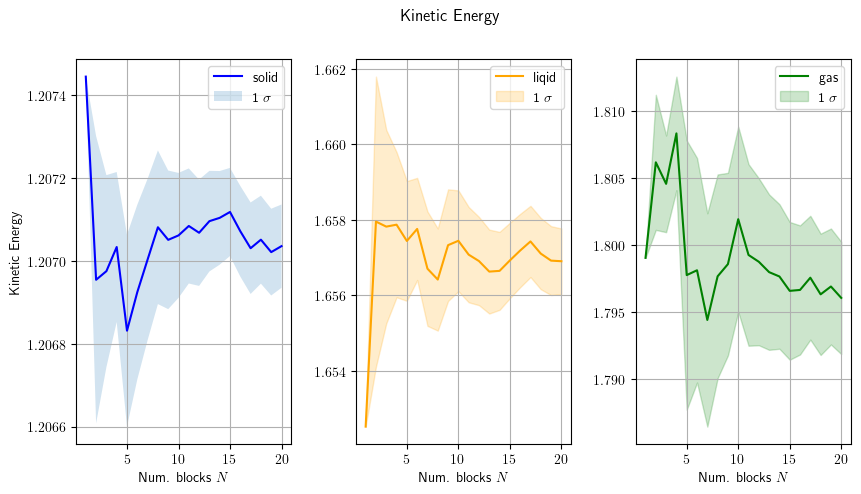

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 3 simulazioni
data1 = np.loadtxt("kinetic_energy_sol.dat")
data2 = np.loadtxt("kinetic_energy_liq.dat")
data3 = np.loadtxt("kinetic_energy_gas.dat")

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Kinetic Energy')

# Grafico fase solida
plt.subplot(1,3,1)
plt.plot(data1[:,0], data1[:,2], color='blue', label='solid')
plt.fill_between(data1[:,0], data1[:,2]-data1[:,3], data1[:,2]+data1[:,3], alpha=0.2, label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.ylabel('Kinetic Energy')
plt.legend()
plt.grid(True)

# Grafico fase liquida
plt.subplot(1,3,2)
plt.plot(data2[:,0], data2[:,2], color='orange', label='liqid')
plt.fill_between(data2[:,0], data2[:,2]-data2[:,3], data2[:,2]+data2[:,3], alpha=0.2, color='orange', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

# Grafico fase gassosa
plt.subplot(1,3,3)
plt.plot(data3[:,0], data3[:,2], color='green', label='gas')
plt.fill_between(data3[:,0], data3[:,2]-data3[:,3], data3[:,2]+data3[:,3], alpha=0.2, color='green', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

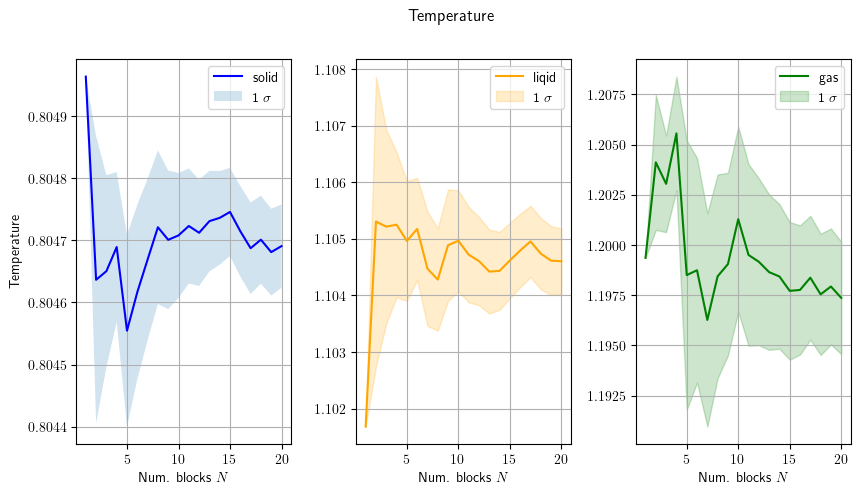

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 3 simulazioni
data1 = np.loadtxt("temperature_sol.dat")
data2 = np.loadtxt("temperature_liq.dat")
data3 = np.loadtxt("temperature_gas.dat")

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Temperature')

# Grafico fase solida
plt.subplot(1,3,1)
plt.plot(data1[:,0], data1[:,2], color='blue', label='solid')
plt.fill_between(data1[:,0], data1[:,2]-data1[:,3], data1[:,2]+data1[:,3], alpha=0.2, label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

# Grafico fase liquida
plt.subplot(1,3,2)
plt.plot(data2[:,0], data2[:,2], color='orange', label='liqid')
plt.fill_between(data2[:,0], data2[:,2]-data2[:,3], data2[:,2]+data2[:,3], alpha=0.2, color='orange', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

# Grafico fase gassosa
plt.subplot(1,3,3)
plt.plot(data3[:,0], data3[:,2], color='green', label='gas')
plt.fill_between(data3[:,0], data3[:,2]-data3[:,3], data3[:,2]+data3[:,3], alpha=0.2, color='green', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

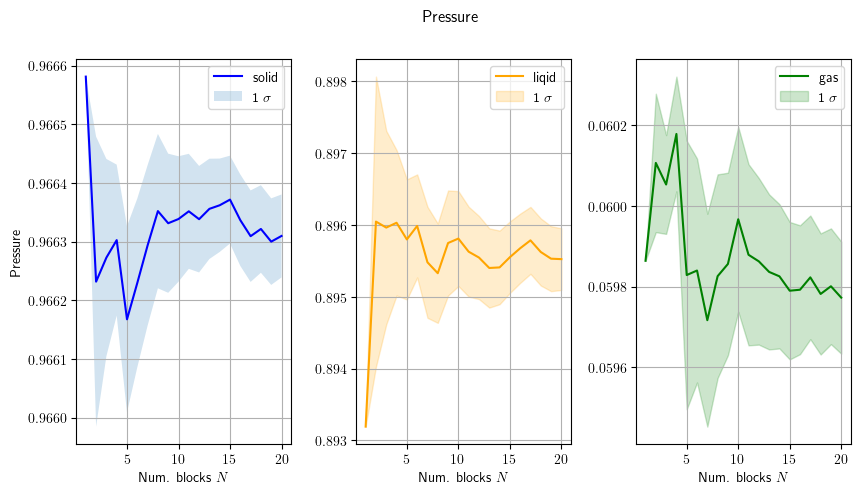

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati delle 3 simulazioni
data1 = np.loadtxt("pressure_sol.dat")
data2 = np.loadtxt("pressure_liq.dat")
data3 = np.loadtxt("pressure_gas.dat")

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('Pressure')

# Grafico fase solida
plt.subplot(1,3,1)
plt.plot(data1[:,0], data1[:,2], color='blue', label='solid')
plt.fill_between(data1[:,0], data1[:,2]-data1[:,3], data1[:,2]+data1[:,3], alpha=0.2, label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)

# Grafico fase liquida
plt.subplot(1,3,2)
plt.plot(data2[:,0], data2[:,2], color='orange', label='liqid')
plt.fill_between(data2[:,0], data2[:,2]-data2[:,3], data2[:,2]+data2[:,3], alpha=0.2, color='orange', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

# Grafico fase gassosa
plt.subplot(1,3,3)
plt.plot(data3[:,0], data3[:,2], color='green', label='gas')
plt.fill_between(data3[:,0], data3[:,2]-data3[:,3], data3[:,2]+data3[:,3], alpha=0.2, color='green', label='1 $\\sigma$')

plt.xlabel('Num. blocks $N$')
plt.legend()
plt.grid(True)

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()